<a href="https://colab.research.google.com/github/gocolman-uru/python-modelos/blob/main/Modelo_tiempo_maraton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# Esto tiene formato de código
```

Sabelo, modelillo

In [1]:
from google.colab import files
uploaded = files.upload()


Saving MarathonData.csv to MarathonData.csv


In [4]:
import io
import pandas as pd
datos_maraton = pd.read_csv(io.BytesIO(uploaded['MarathonData.csv']))

In [5]:
datos_maraton.head()


,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A


In [6]:
datos_maraton['Name']

0         Blair MORGAN
1        Robert Heczko
2        Michon Jerome
3        Daniel Or lek
4         Luk ? Mr zek
            ...       
82    Stefano Vegliani
83      Andrej Madliak
84          Yoi Ohsako
85          Simon Dunn
86         Pavel ?imek
Name: Name, Length: 87, dtype: object

In [7]:
datos_maraton.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             87 non-null     int64  
 1   Marathon       87 non-null     object 
 2   Name           87 non-null     object 
 3   Category       81 non-null     object 
 4   km4week        87 non-null     float64
 5   sp4week        87 non-null     float64
 6   CrossTraining  13 non-null     object 
 7   Wall21         87 non-null     object 
 8   MarathonTime   87 non-null     float64
 9   CATEGORY       87 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 6.9+ KB


In [9]:
datos_maraton['Wall21'] = pd.to_numeric(datos_maraton['Wall21'],errors='coerce')

In [10]:
datos_maraton.describe()

,id,km4week,sp4week,Wall21,MarathonTime
count,87.000000,87.000000,87.000000,81.000000,87.000000
mean,44.000000,62.347126,139.840706,1.630617,3.319080
std,25.258662,26.956019,1191.427864,0.210490,0.376923
min,1.000000,17.900000,8.031414,1.160000,2.370000
25%,22.500000,44.200000,11.498168,1.450000,3.045000
50%,44.000000,58.800000,12.163424,1.620000,3.320000
75%,65.500000,77.500000,12.854036,1.760000,3.605000
max,87.000000,137.500000,11125.000000,2.050000,3.980000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37eacdab70>,
      dtype=object)

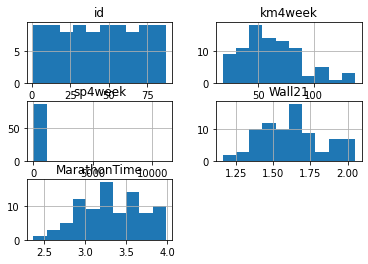

In [11]:
datos_maraton.hist()


In [12]:
datos_maraton = datos_maraton.drop(columns=['Name'])
datos_maraton = datos_maraton.drop(columns=['id'])
datos_maraton = datos_maraton.drop(columns=['Marathon'])
datos_maraton = datos_maraton.drop(columns=['CATEGORY'])
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,NaN,1.16,2.37
1,MAM,68.6,13.674419,NaN,1.23,2.59
2,MAM,82.7,13.520436,NaN,1.30,2.66
3,M45,137.5,12.258544,NaN,1.32,2.68
4,MAM,84.6,13.945055,NaN,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,NaN,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,NaN,1.94,3.94
85,M45,33.2,11.066667,NaN,2.05,3.95


In [13]:
datos_maraton.isna().sum()

Category          6
km4week           0
sp4week           0
CrossTraining    74
Wall21            6
MarathonTime      0
dtype: int64

In [14]:
datos_maraton.isna()

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,False,False,False,True,False,False
1,False,False,False,True,False,False
2,False,False,False,True,False,False
3,False,False,False,True,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
82,False,False,False,True,False,False
83,False,False,False,False,False,False
84,False,False,False,True,False,False
85,False,False,False,True,False,False


In [15]:
# Debido a que har varios datos nulos, la idea es rellenarlos con 0 para completar con algo las celdas

datos_maraton['CrossTraining'] = datos_maraton['CrossTraining'].fillna(0)
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [16]:
# Aca lo que hago es , voy arriba a los campos con valores nulos, y directamente borro la fila de datos. Borro los registros que los demas dan nulos, dado que son muy pocos

datos_maraton = datos_maraton.dropna(how='any')
datos_maraton

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,ciclista 3h,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [17]:
# Lidiar con los datos no numericos, modificar los datos a numericos para que el modelo se sienta bien

# Traducir Category y CrossTraining

datos_maraton['CrossTraining'].unique()

array([0, 'ciclista 1h', 'ciclista 4h', 'ciclista 13h', 'ciclista 3h',
       'ciclista 5h'], dtype=object)

In [18]:
valores_cross = {'CrossTraining': {'ciclista 1h':1, 'ciclista 3h':2, 'ciclista 4h':3, 'ciclista 5h':4, 'ciclista 13h':5}}
datos_maraton.replace(valores_cross, inplace=True)
datos_maraton


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,MAM,132.8,14.434783,0,1.16,2.37
1,MAM,68.6,13.674419,0,1.23,2.59
2,MAM,82.7,13.520436,0,1.30,2.66
3,M45,137.5,12.258544,0,1.32,2.68
4,MAM,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,M55,50.0,10.830325,0,2.02,3.93
83,M40,33.6,10.130653,2,1.94,3.93
84,M40,55.4,11.043189,0,1.94,3.94
85,M45,33.2,11.066667,0,2.05,3.95


In [19]:
datos_maraton['Category'].unique()

array(['MAM', 'M45', 'M40', 'M50', 'M55', 'WAM'], dtype=object)

In [20]:
valores_cat = {'Category': {'MAM':1, 'M45':2, 'M40':3, 'M50':4, 'M55':5, 'WAM':6}}
datos_maraton.replace(valores_cat, inplace=True)
datos_maraton

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
0,1,132.8,14.434783,0,1.16,2.37
1,1,68.6,13.674419,0,1.23,2.59
2,1,82.7,13.520436,0,1.30,2.66
3,2,137.5,12.258544,0,1.32,2.68
4,1,84.6,13.945055,0,1.36,2.74
...,...,...,...,...,...,...
82,5,50.0,10.830325,0,2.02,3.93
83,3,33.6,10.130653,2,1.94,3.93
84,3,55.4,11.043189,0,1.94,3.94
85,2,33.2,11.066667,0,2.05,3.95


In [21]:
datos_maraton.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 86
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Category       81 non-null     int64  
 1   km4week        81 non-null     float64
 2   sp4week        81 non-null     float64
 3   CrossTraining  81 non-null     int64  
 4   Wall21         81 non-null     float64
 5   MarathonTime   81 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 4.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f37ea5d04e0>,
      dtype=object)

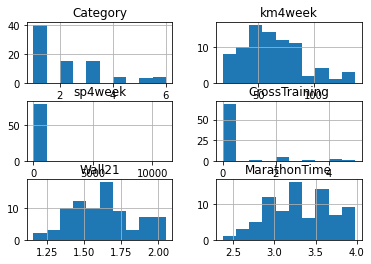

In [22]:
datos_maraton.hist()

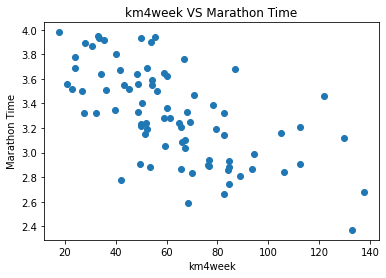

In [23]:
# Olfatear alguna relacion entre dif variables. Pintar el tiempo de maraton vs alguna otra variable que quizas esten realcionadas
import matplotlib.pyplot as plt
plt.scatter(x = datos_maraton['km4week'], y = datos_maraton['MarathonTime'])
plt.title('km4week VS Marathon Time')
plt.xlabel('km4week')
plt.ylabel('Marathon Time')
plt.show()


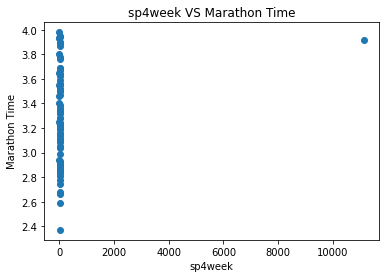

In [24]:
plt.scatter(x = datos_maraton['sp4week'], y = datos_maraton['MarathonTime'])
plt.title('sp4week VS Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

In [26]:
#en la ultima grafica como vemos un outlier , me va a cagar todo el analisis y la muestra me la mancha, por lo que con una query lo que decido es borrarlo
datos_maraton = datos_maraton.query('sp4week<1000')

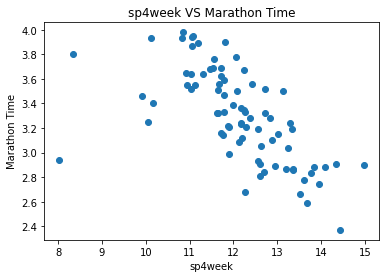

In [27]:
plt.scatter(x = datos_maraton['sp4week'], y = datos_maraton['MarathonTime'])
plt.title('sp4week VS Marathon Time')
plt.xlabel('sp4week')
plt.ylabel('Marathon Time')
plt.show()

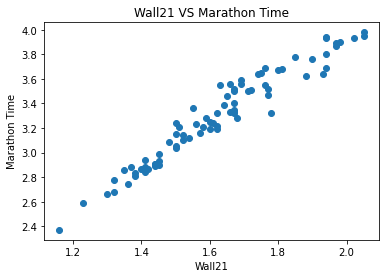

In [28]:
# seguir con el procesamiento
plt.scatter(x = datos_maraton['Wall21'], y = datos_maraton['MarathonTime'])
plt.title('Wall21 VS Marathon Time')
plt.xlabel('Wall21')
plt.ylabel('Marathon Time')
plt.show()

YA PROCESE LOS DATOS, AHORA PASAR A ENTRENAR EL MODELO DE ML

In [29]:
# Partir los datos en dos, datos de training y datos de test. SPLIT DATASET

datos_entrenamiento = datos_maraton.sample(frac=0.8, random_state=0)
datos_test = datos_maraton.drop(datos_entrenamiento.index)


In [30]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime
54,3,70.7,11.783333,0,1.77,3.47
28,2,51.6,13.008403,0,1.50,3.15
31,1,79.4,13.344538,0,1.60,3.19
84,3,55.4,11.043189,0,1.94,3.94
47,2,39.6,12.247423,0,1.67,3.35
...,...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67,3.50
20,1,94.5,11.886792,0,1.45,2.99
79,1,53.9,11.802920,0,1.98,3.90
8,1,70.0,13.770492,1,1.38,2.83


In [31]:
# separar la variable que queremos predecir, en nuestro caso el Tiempo de Maraton

etiquetas_entrenamiento = datos_entrenamiento.pop('MarathonTime')
etiquetas_test = datos_test.pop('MarathonTime')

In [32]:
etiquetas_entrenamiento

54    3.47
28    3.15
31    3.19
84    3.94
47    3.35
      ... 
55    3.50
20    2.99
79    3.90
8     2.83
13    2.88
Name: MarathonTime, Length: 64, dtype: float64

In [33]:
datos_entrenamiento

,Category,km4week,sp4week,CrossTraining,Wall21
54,3,70.7,11.783333,0,1.77
28,2,51.6,13.008403,0,1.50
31,1,79.4,13.344538,0,1.60
84,3,55.4,11.043189,0,1.94
47,2,39.6,12.247423,0,1.67
...,...,...,...,...,...
55,1,26.9,13.121951,0,1.67
20,1,94.5,11.886792,0,1.45
79,1,53.9,11.802920,0,1.98
8,1,70.0,13.770492,1,1.38


In [34]:
# ENTRENAR EL MODELO MAS SIMPLE - Regresion lineal

from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(datos_entrenamiento,etiquetas_entrenamiento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
# ver como debia haber centrado, que tan alejado esta de la realidad

predicciones = modelo.predict(datos_test)
predicciones

array([2.79390706, 2.81599412, 3.05747527, 3.0497715 , 3.0601308 ,
       3.29473308, 3.36211907, 3.36226188, 3.17473152, 3.29138286,
       3.37757783, 3.5216523 , 3.5919168 , 3.55016407, 3.66416024,
       3.85281097])

In [36]:
# comparar las predicciones con el dataset de test vs el real dato del dataset de test. comparar que onda

import numpy as np
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print('Error porcentual del modelo: %f' % (error*100))
print('Error porcentual del modelo:', error*100)

Error porcentual del modelo: 11.030345
Error porcentual del modelo: 11.0303447336147


In [39]:
# el % del error es 11, mm dependiendo de la problematica, pero teniendo en cuenta lo que es y que es una maraton,, estamos conformes

nuevos_datos = pd.DataFrame(np.array([[1, 400, 20, 0, 1.4],[2, 350, 20, 0, 1.6]]), columns = {'Category', 'km4week', 'sp4week', 'CrossTraining', 'Wall21'})
nuevos_datos


,Category,CrossTraining,km4week,sp4week,Wall21
0,1.0,400.0,20.0,0.0,1.4
1,2.0,350.0,20.0,0.0,1.6


In [40]:
# predecir el tiempo del maraton para los pibitos corredores

modelo.predict(nuevos_datos)

array([2.199872  , 2.58999664])